# 01 - Enhanced EDA: Credit Risk Analysis

This notebook dives deeper into the Home Credit dataset with domain-focused insights and transformations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Load dataset
df = pd.read_csv('../data/raw/application_train.csv')

# Overview
df.shape, df.columns[:5]


((307511, 122),
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR'],
       dtype='object'))

## Missing Value Heatmap and Threshold Filtering

<Axes: >

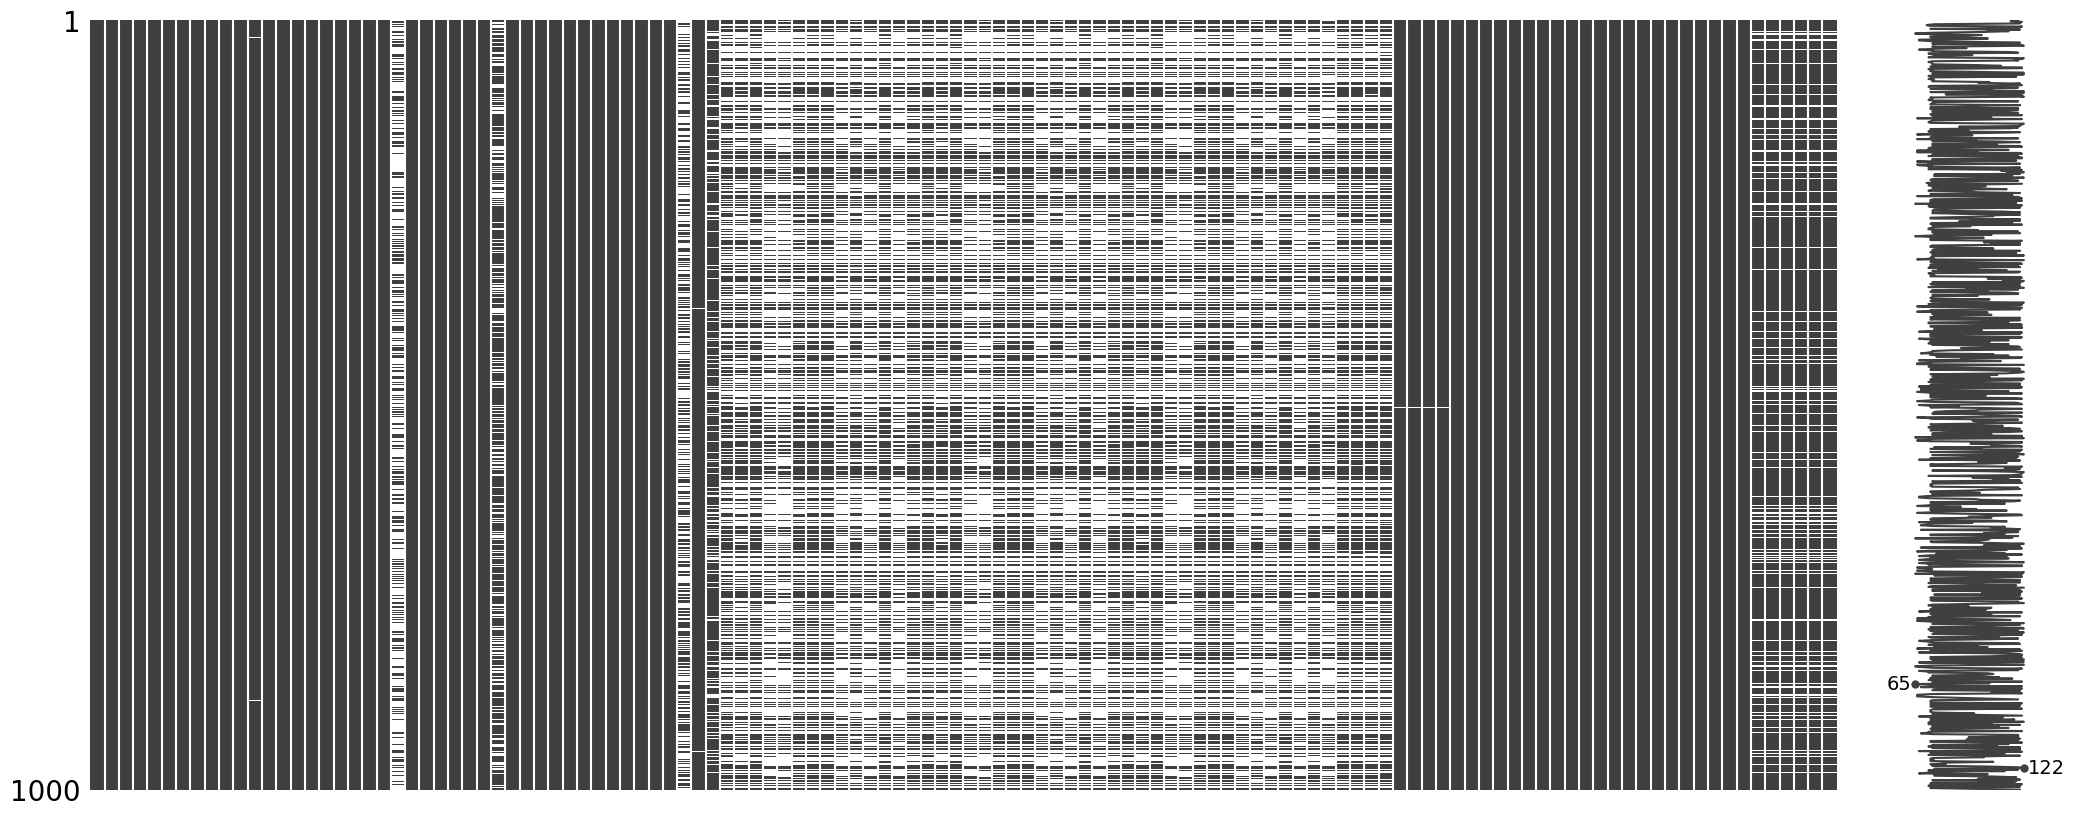

In [6]:
import missingno as msno
msno.matrix(df.sample(1000))


<Axes: >

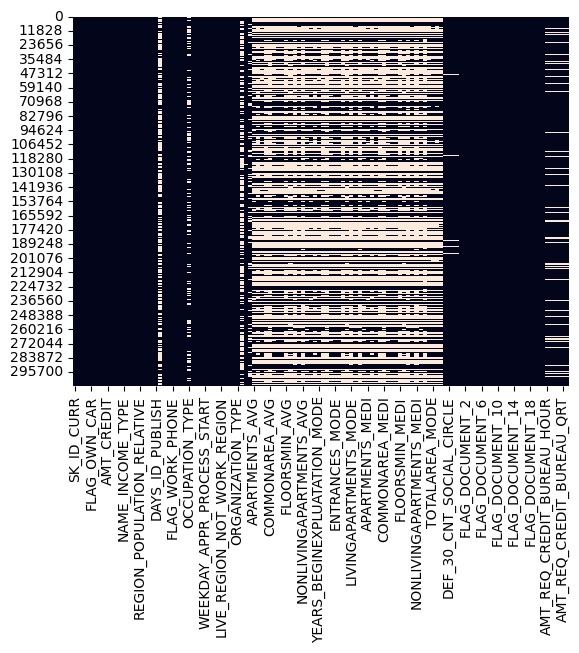

In [8]:
sns.heatmap(df.isnull(), cbar=False)


In [7]:
# Show missing values visually
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)


In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values[:20], y=missing.index[:20])
plt.title("Top 20 Columns with Missing Data (%)")
plt.xlabel("Percent Missing")
plt.show()


## Target Distribution and Class Balance

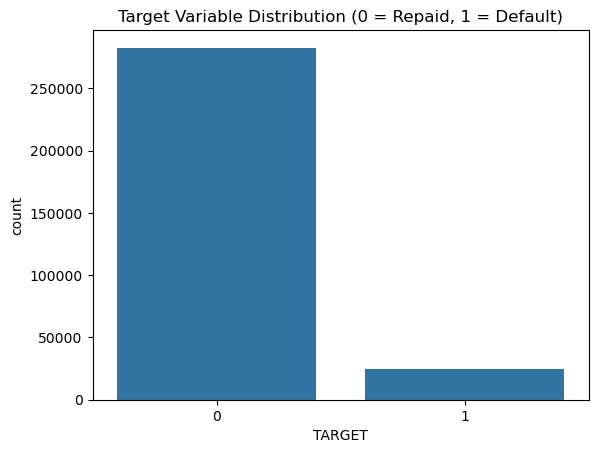

Default rate: 8.07%


In [3]:
sns.countplot(x='TARGET', data=df)
plt.title('Target Variable Distribution (0 = Repaid, 1 = Default)')
plt.show()

default_rate = df['TARGET'].mean()
print(f"Default rate: {default_rate:.2%}")


## Numerical Features: Distribution and Normality

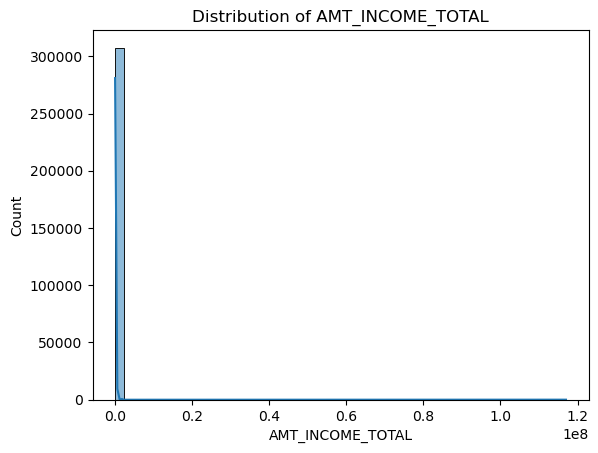

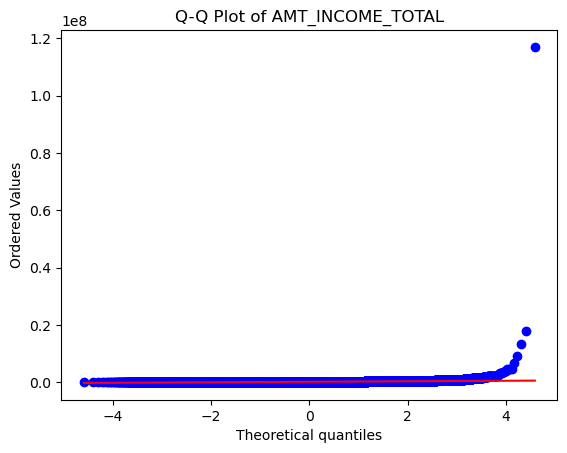

In [4]:
# Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['TARGET', 'SK_ID_CURR']]

# Check normality with histogram and Q-Q plot
import scipy.stats as stats
import matplotlib.pyplot as plt

sample_col = 'AMT_INCOME_TOTAL'
sns.histplot(df[sample_col].dropna(), bins=50, kde=True)
plt.title(f'Distribution of {sample_col}')
plt.show()

# Q-Q plot
stats.probplot(df[sample_col].dropna(), dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {sample_col}')
plt.show()


## Transforming Skewed Variables with PowerTransformer

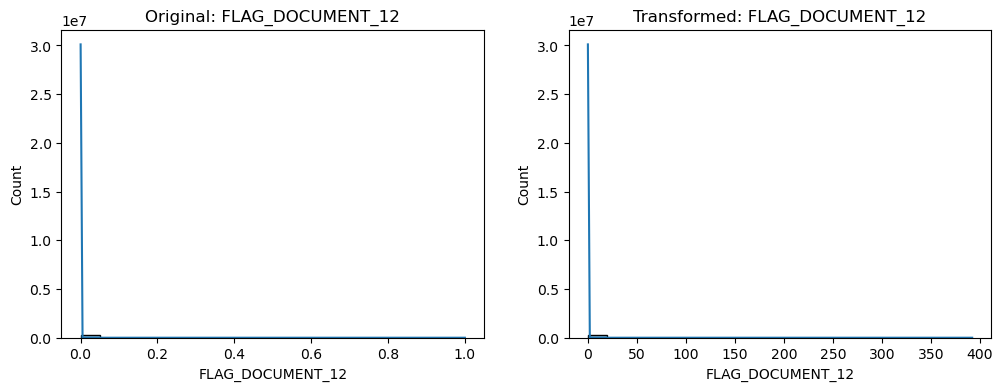

In [5]:
# Log transformation of skewed features
skewed_features = df[num_cols].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 1].index.tolist()

pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[high_skew] = pt.fit_transform(df[high_skew].fillna(0))

# Compare before and after for one column
col = high_skew[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df[col].fillna(0), ax=axs[0], kde=True)
axs[0].set_title(f'Original: {col}')
sns.histplot(df_transformed[col], ax=axs[1], kde=True)
axs[1].set_title(f'Transformed: {col}')
plt.show()


## Correlation with Target Variable

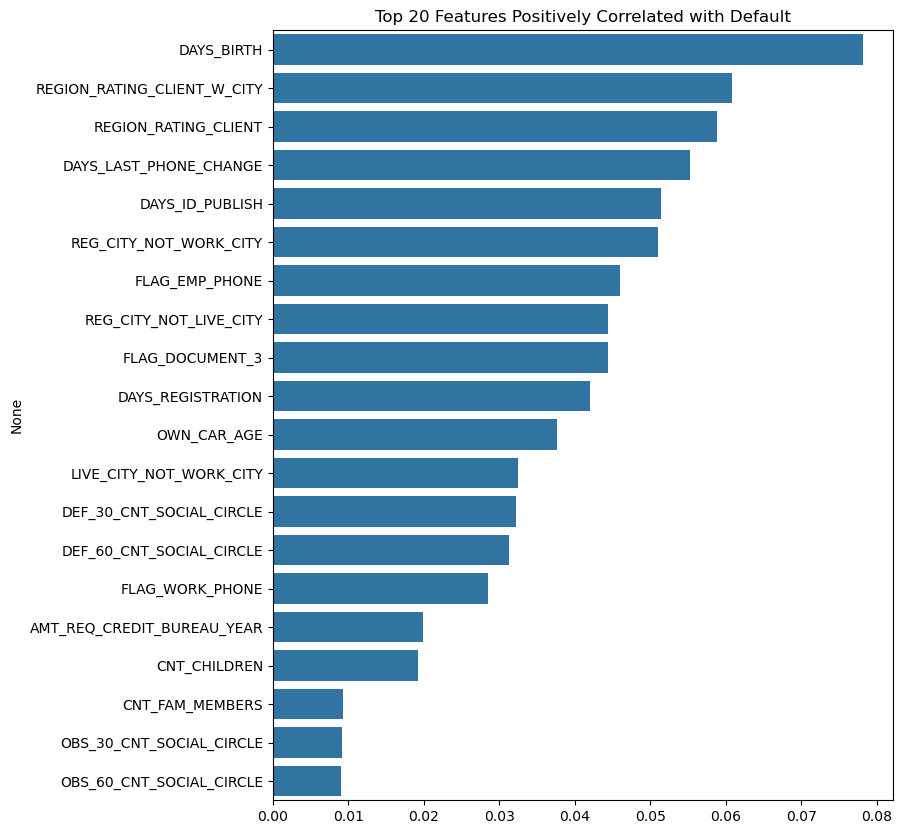

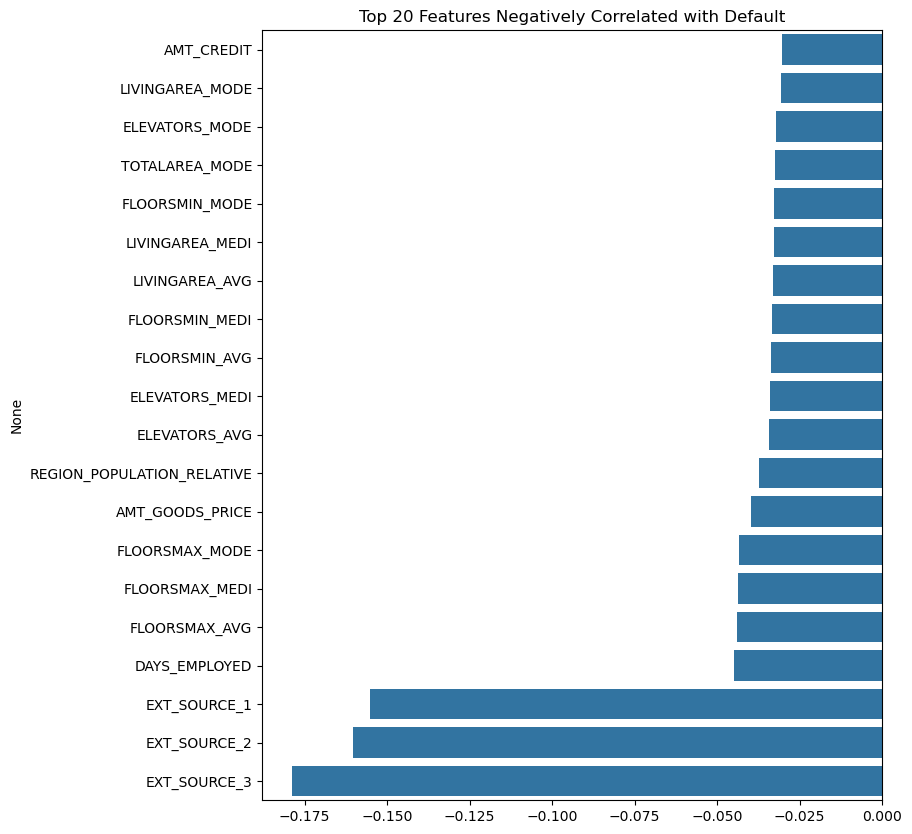

In [9]:
# Compute correlations with target
corr = df.corr(numeric_only=True)['TARGET'].drop('TARGET').sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr.values[:20], y=corr.index[:20])
plt.title("Top 20 Features Positively Correlated with Default")
plt.show()

plt.figure(figsize=(8, 10))
sns.barplot(x=corr.values[-20:], y=corr.index[-20:])
plt.title("Top 20 Features Negatively Correlated with Default")
plt.show()
